# SPICED Academy // WEEK 03 // Bike Sharing Demand Prediction
## Data Exploration Notebook

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv('data/train.csv', index_col=0, parse_dates=True)

In [111]:
df.shape

(10886, 11)

In [21]:
X = df.drop(['casual','registered','count'], axis=1)
y = df['count']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [24]:
X_train.shape

(8708, 8)

In [3]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
for column in df.columns:
    if df[str(column)].nunique() < 10:
        print(column, df[str(column)].unique())

season [1 2 3 4]
holiday [0 1]
workingday [0 1]
weather [1 2 3 4]


### Variables Definitions:


#### Features:

* datetime      - hourly date + timestamp  
* season        
    * 1 = spring
    * 2 = summer
    * 3 = fall
    * 4 = winter 
* holiday       - whether the day is considered a holiday
* workingday    - whether the day is neither a weekend nor holiday
* weather       
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light * Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp          - temperature in Celsius
* atemp         - "feels like" temperature in Celsius
* humidity      - relative humidity
* windspeed     - wind speed


#### Lables:

* casual        - number of non-registered user rentals initiated
* registered    - number of registered user rentals initiated
* count         - number of total rentals

### Variable Types:

#### Ordinal


* season
* weather


#### Binary


* holiday
* workingday


#### Continuous

* temp
* atemp
* humidy
* windspeed

<AxesSubplot:xlabel='datetime'>

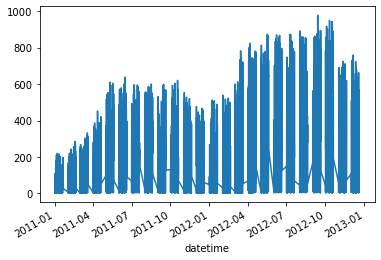

In [35]:
y_train.plot()

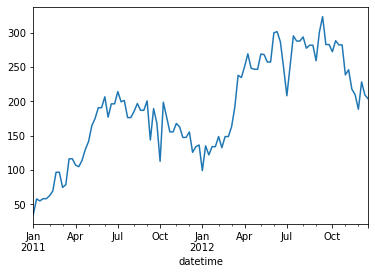

In [56]:
y_train.resample('w').mean().fillna(method='ffill').plot()
despine = True

In [92]:
y_train = y_train.reset_index()

In [95]:
y_train['year'] = y_train['datetime'].dt.year
y_train['month'] = y_train['datetime'].dt.month
y_train['weekday'] = y_train['datetime'].dt.weekday
y_train['hour'] = y_train['datetime'].dt.hour

In [96]:
y_train

,datetime,count,year,month,weekday,hour
0,2011-06-18 19:00:00,326,2011,6,5,19
1,2012-09-08 17:00:00,171,2012,9,5,17
2,2011-05-01 17:00:00,196,2011,5,6,17
3,2012-11-19 00:00:00,27,2012,11,0,0
4,2011-05-16 09:00:00,194,2011,5,0,9
...,...,...,...,...,...,...
8703,2011-02-08 03:00:00,1,2011,2,1,3
8704,2012-01-12 11:00:00,119,2012,1,3,11
8705,2012-06-13 23:00:00,153,2012,6,2,23
8706,2011-04-02 14:00:00,190,2011,4,5,14


<AxesSubplot:xlabel='datetime'>

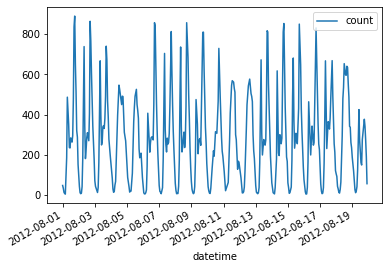

In [101]:
y_train[(y_train['year']==2012) & (y_train['month']==8)][['datetime','count']].set_index('datetime').plot()

<AxesSubplot:xlabel='hour'>

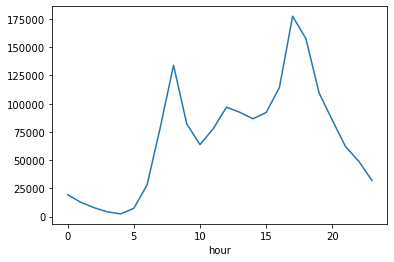

In [80]:
y_train.groupby('hour')['count'].sum().plot()
#y_plot.plot.scatter(x='hour',y='count')

<AxesSubplot:xlabel='weekday'>

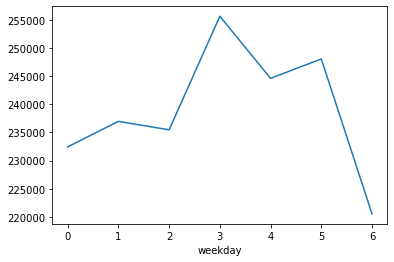

In [103]:
y_train.groupby('weekday')['count'].sum().plot()


<AxesSubplot:xlabel='month'>

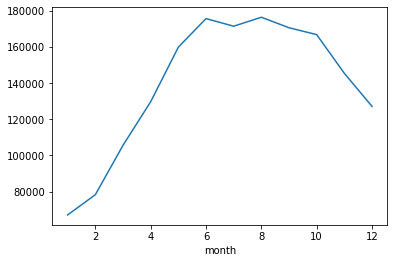

In [87]:
y_train.groupby('month')['count'].sum().plot()

<AxesSubplot:xlabel='weekday'>

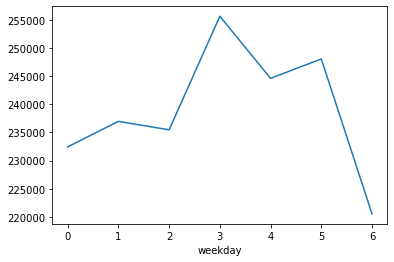

In [88]:
y_train.groupby('weekday')['count'].sum().plot()

<AxesSubplot:xlabel='hour'>

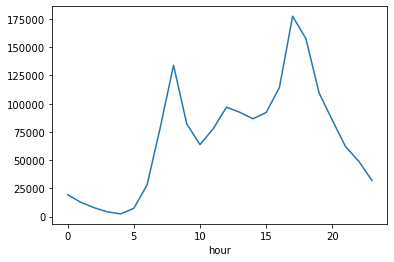

In [89]:
y_train.groupby('hour')['count'].sum().plot()

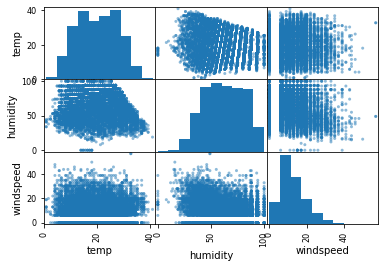

In [112]:
pd.plotting.scatter_matrix(X_train[['temp','humidity','windspeed']])
despine=True

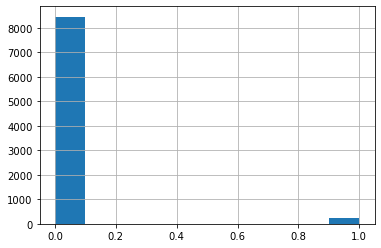

In [109]:
X_train['holiday'].hist()
despine = True

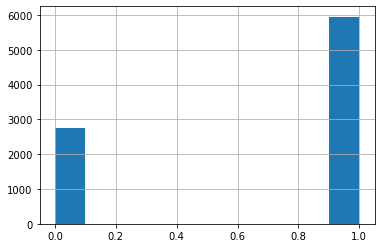

In [110]:
X_train['workingday'].hist()
despine = True